# Load Community Model

In [78]:
import micom as mc
com = mc.load_pickle("../../../data/community.pickle")

Read LP format model from file C:\Users\domin\AppData\Local\Temp\tmpgise13tj.lp
Reading time = 0.06 seconds
: 4042 rows, 11287 columns, 43241 nonzeros


In [3]:
# Basic stats for the paper:
import csv

with open('basic_com_model_properties.csv', 'w') as fil:
    # create the csv writer
    writer = csv.writer(fil)
    title = ["ID","Model ID","Genes","Rxns","Metabolites", "Objective Function"]
    writer.writerow(title)
    
    with com as model:
        x = [
            "Community Model",
            model.id,
            len(model.genes),
            len(model.reactions),
            len(model.metabolites)
        ]
            # [i.id for i in model.reactions if i.objective_coefficient != 0][0]
        writer.writerow(x)


# Default Scenario MICOM

In [120]:
# Individual model optimisation solutions, the higher of the two will be the community solution when the tradeoff is completely in favour of community.
com.optimize_all()



[23:31:56] WARNING  `optimize_all` is deprecated and will be removed soon :(                       ]8;id=271849;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=953593;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#485\485]8;;\

           WARNING  `optimize_single` is deprecated and will be removed soon :(                    ]8;id=251927;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=656399;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#446\446]8;;\

           WARNING  `optimize_single` is deprecated and will be removed soon :(                    ]8;id=559540;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=876654;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#446\446]8;;\

id
AG_uc    3.644994
GD_uc    3.386610
dtype: float64

In [19]:
temp_sol = com.cooperative_tradeoff(fraction = 0.5, fluxes=True, pfba=True)
temp_sol

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,0.908383,2587,1808
GD_uc,0.5,0.914114,2705,1880
medium,NaN,NaN,351,351


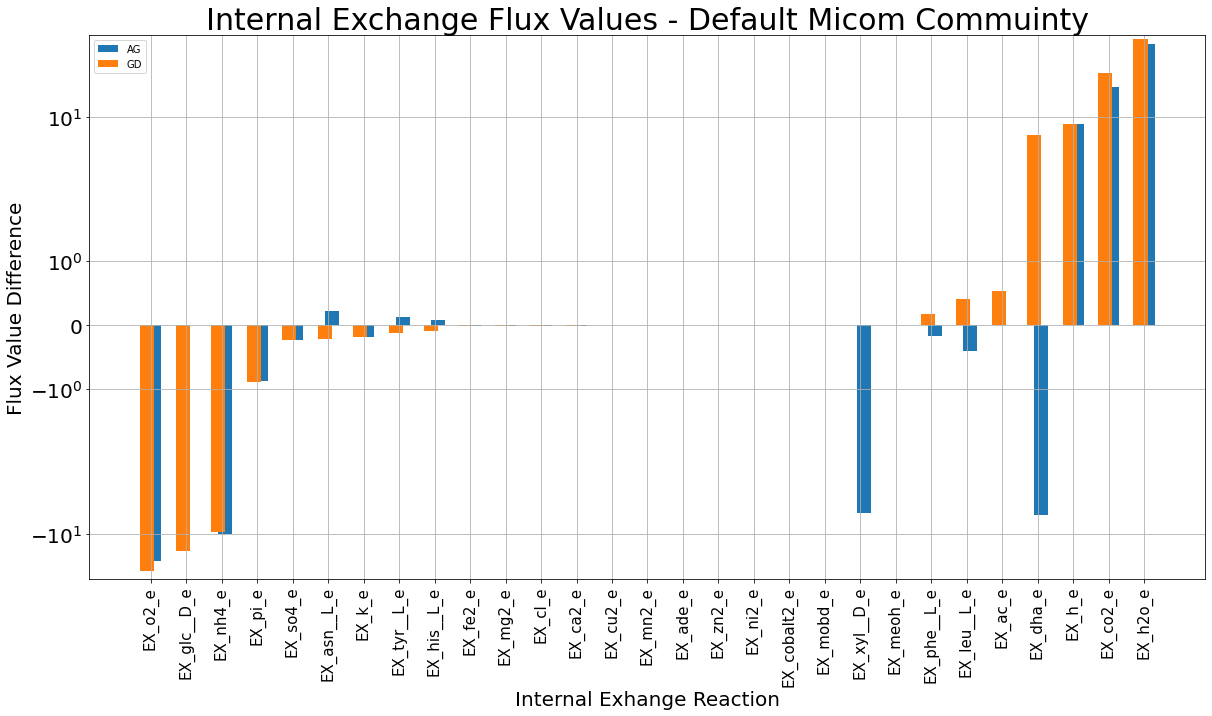

In [22]:
from utils import getInternalExchangeFluxes
from utilPlots import plotIntExchFlux

temp = getInternalExchangeFluxes(com, temp_sol)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Default Micom Commuinty CT=0.5",save_output=False)


In [23]:
temp_sol = com.cooperative_tradeoff(fraction = 0.96, fluxes=True, pfba=True)
temp_sol

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,1.749602,2587,1808
GD_uc,0.5,1.749592,2705,1880
medium,NaN,NaN,351,351


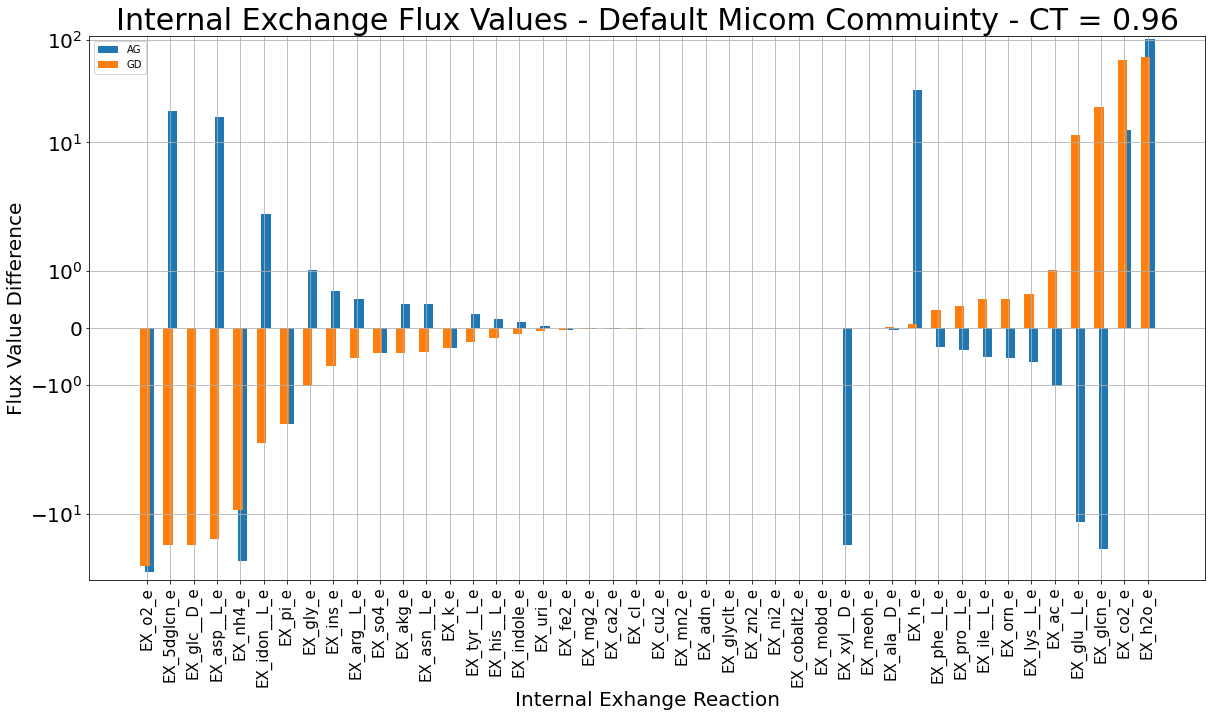

In [24]:
temp = getInternalExchangeFluxes(com, temp_sol)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Default Micom Commuinty - CT = 0.96",save_output=False)


# Cooperative Tradeoff Scan

In [101]:
# Run micom cooperative tradeoff through a specific range to see what occurs
# at the 'inflection point. 0.4->1 
# Save resultant solutions to a pickle object for easy retreival
import numpy as np
import pickle

# Note this will take ~3minutes x length of the fraction array.
run = input()
if run == "Yes":
    coop_scan_sols = com.cooperative_tradeoff(fraction = np.arange(0.4, 1 + 1e-06, 0.02), fluxes=True, pfba=False) # pfba is throwing an error so set to false

    with open("coop_scan_sols.pickle", 'wb') as fp:
        pickle.dump(coop_scan_sols,fp)



wooo


In [121]:
coop_scan_sols = com.cooperative_tradeoff(fraction = np.arange(1, 1 + 1e-06, 0.02), fluxes=False, pfba=True)

In [122]:
coop_scan_sols

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,0.725650,2587,1808
GD_uc,0.5,0.732348,2705,1880
medium,NaN,NaN,351,351


In [ ]:
coop_scan_sols = pickle.load("coop_scan_sols.pickle")

In [104]:
# Explore the change in internal exchanges:
# untested

num_exchs =[]

# for i in [temp_sol]:
for i in coop_scan_sols:
    temp = getInternalExchangeFluxes(com, i)
    num_exchs.append(len(temp))

# to plot.

44


Index(['EX_glu__L_e', 'EX_glyclt_e', 'EX_idon__L_e', 'EX_ile__L_e', 'EX_ins_e',
       'EX_lys__L_e', 'EX_uri_e'],
      dtype='object', name='reaction')


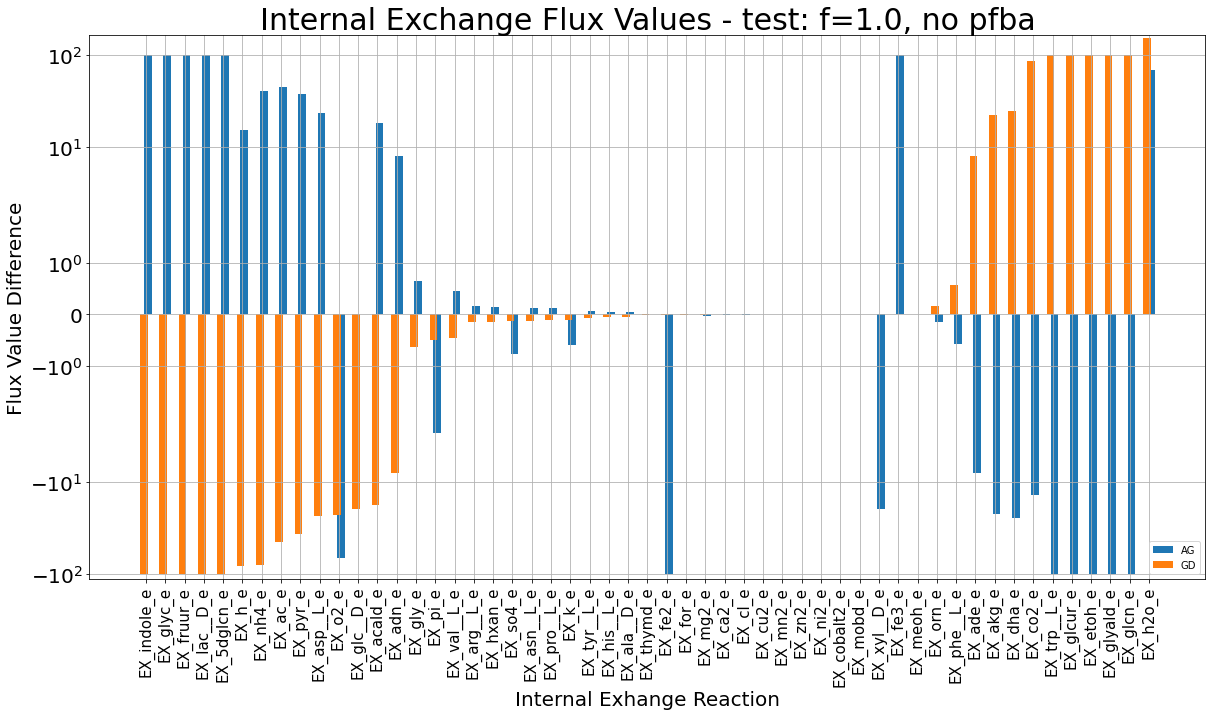

In [119]:
temp2 = getInternalExchangeFluxes(com, coop_scan_sols2)
len(temp)
len(temp2)

# temp.index.difference(temp2.index)
def diff_IntExFluxes(A,B):
    return A.index.difference(B.index)
    

print(diff_IntExFluxes(temp, temp2))
temp2
plotIntExchFlux(com,temp2,"Internal Exchange Flux Values - test: f=1.0, no pfba",save_output=False)


Breaker


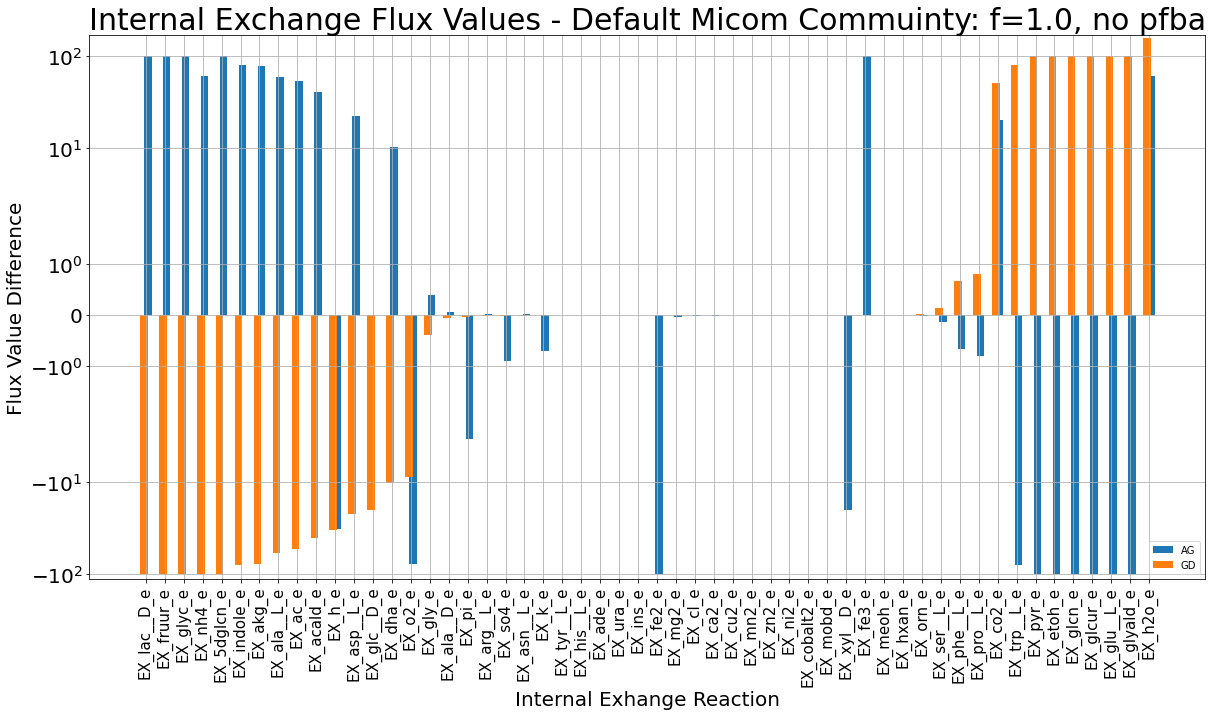

In [40]:
temp = getInternalExchangeFluxes(com, coop_scan_sols2)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Default Micom Commuinty: f=1.0, no pfba",save_output=False)


In [42]:
len(temp)

54

In [107]:
temp_sol

reaction,12DGR120tipp,12DGR140tipp,12DGR141tipp,12DGR160tipp,12DGR161tipp,12DGR180tipp,12DGR181tipp,12PPDRtex,12PPDRtpp,12PPDStex,...,XYLUtex,XYLabcpp,XYLt2pp,XYLtex,YUMPS,ZN2abcpp,ZN2t3pp,ZN2tpp,ZNabcpp,Zn2tex
compartment,,,,,,,,,,,,,,,,,,,,,
AG_uc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,20.0,NaN,0.0,0.0,0.000597,0.0,0.000597
GD_uc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000596,0.0,0.000596
medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# com.variables.community_objective
com.scale

1000.0

In [53]:
# with com as m:
#     m.
com.optimize_single("AG_uc")

[21:46:34] WARNING  `optimize_single` is deprecated and will be removed soon :(                    ]8;id=400404;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=215413;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#446\446]8;;\

3.644994045294769

In [54]:
com.optimize_single("GD_uc")

[21:46:55] WARNING  `optimize_single` is deprecated and will be removed soon :(                    ]8;id=684952;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=143922;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#446\446]8;;\

3.3866099205098945

In [55]:
com.optimize_all()

[21:48:11] WARNING  `optimize_all` is deprecated and will be removed soon :(                       ]8;id=397870;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=243835;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#485\485]8;;\

           WARNING  `optimize_single` is deprecated and will be removed soon :(                    ]8;id=869787;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=766639;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#446\446]8;;\

           WARNING  `optimize_single` is deprecated and will be removed soon :(                    ]8;id=925436;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py\community.py]8;;\:]8;id=850401;file://c:\Users\domin\Anaconda3\envs\gsmm-3\lib\site-packages\micom\community.py#446\446]8;;\

id
AG_uc    3.644994
GD_uc    3.386610
dtype: float64

In [56]:
com.optimize()

,abundance,growth_rate,reactions,metabolites
compartments,,,,
AG_uc,0.5,3.644994,2587,1808
GD_uc,0.5,0.000000,2705,1880
medium,NaN,NaN,351,351


In [67]:
com.exchanges.EX_glc__D_m.bounds
with com as m:
    m.exchanges.EX_glc__D_m.bounds = (-20,1000)
    a  = m.optimize()
    print(a.members)

              abundance  growth_rate  reactions  metabolites
compartments                                                
AG_uc               0.5     5.663729       2587         1808
GD_uc               0.5     0.000000       2705         1880
medium              NaN          NaN        351          351


In [68]:
temp = getInternalExchangeFluxes(com, a)
plotIntExchFlux(com,temp,"Internal Exchange Flux Values - Default Micom Commuinty: f=1.0, no pfba",save_output=False)


AttributeError: 'NoneType' object has no attribute 'T'

In [77]:
# com.reactions.SALIDROSIDE_BIOSYNTHESIS__GD_uc

com.objective = "SALIDROSIDE_BIOSYNTHESIS__GD_uc"
x = com.optimize()
x.objective_value


IndexError: list index out of range